# Data preparation and understanding

In [2]:
import pandas as pd
import glob as glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### On commence par importer nos 4 datasets et on affiche le nombre de leurs lignes

In [4]:
file_paths_2113 = glob.glob('HGS\\2113\\*.csv')

XML100_2113 = []
column_names = ["Instance", "Cout", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13", "S14", "S15", "S16", "S17", "S18"]
for file_path in file_paths_2113:
    df = pd.read_csv(file_path, names = column_names,sep =';')
    XML100_2113.append(df)

XML100_2113_df = pd.concat(XML100_2113, ignore_index=True)

XML100_2113_df.shape[0]


2536722

In [3]:
file_paths_2213 = glob.glob('HGS\\2213\\*.csv')

XML100_2213 = []
column_names = ["Instance", "Cout", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13", "S14", "S15", "S16", "S17", "S18"]
for file_path in file_paths_2213:
    df = pd.read_csv(file_path, names = column_names,sep =';')
    XML100_2213.append(df)

XML100_2213_df = pd.concat(XML100_2213, ignore_index=True)
XML100_2213_df.shape[0]

3302699

In [4]:
file_paths_3113 = glob.glob('HGS\\3113\\*.csv')

XML100_3113 = []
column_names = ["Instance", "Cout", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13", "S14", "S15", "S16", "S17", "S18"]
for file_path in file_paths_3113:
    df = pd.read_csv(file_path, names = column_names,sep =';')
    XML100_3113.append(df)

XML100_3113_df = pd.concat(XML100_3113, ignore_index=True)
XML100_3113_df.shape[0]

4137693

In [5]:
file_paths_3213 = glob.glob('HGS\\3213\\*.csv')

XML100_3213 = []
column_names = ["Instance", "Cout", "S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8", "S9", "S10", "S11", "S12", "S13", "S14", "S15", "S16", "S17", "S18"]
for file_path in file_paths_3213:
    df = pd.read_csv(file_path, names = column_names,sep =';')
    XML100_3213.append(df)

XML100_3213_df = pd.concat(XML100_3213, ignore_index=True)
XML100_3213_df.shape[0]

4132400

#### Compte-tenu des grandres tailles des 4 datasets obtenus, le traitement du dataset final (fusion des 4 datasets) ne pourra pas se faire en local sur nos machines.
#### Pour cela on décide de prendre que 12% des lignes du dataset de plus petite taille(XML100_3213_df) pour former le dataset final. On utilise la fonction sample de pandas.

In [6]:
size = int(XML100_2113_df.shape[0] * 0.12)


XML100_2113_df = XML100_2113_df.sample(size)
XML100_2213_df = XML100_2213_df.sample(size)
XML100_3113_df = XML100_3113_df.sample(size)
XML100_3213_df = XML100_3213_df.sample(size)


In [7]:
for df in [XML100_2113_df, XML100_2213_df, XML100_3113_df, XML100_3213_df] :
    print(df.shape)

(304406, 20)
(304406, 20)
(304406, 20)
(304406, 20)


#### La colonne S7 est celle qui mal calculée car elle ne contient que des valeurs nulles. on la supprime après avoir fusionné nos 4 datasets

In [8]:
df = pd.concat([XML100_2113_df, XML100_2213_df, XML100_3113_df, XML100_3213_df], ignore_index=True).drop('S7', axis=1)
df = df.sample(frac=1)
df.head()

,Instance,Cout,S1,S2,S3,S4,S5,S6,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
1207449,XML100_3213_24,23127,83.7111,47.8062,0.0335,0.0195,860.615,76.6977,793.000,0.4473,0.0416,1524.62,0.2643,0.1321,0.0202,176.020,191.069,0.8213,3.7491
876210,XML100_3113_11,22390,202.3880,121.1060,0.0878,0.0656,848.417,346.8610,628.167,0.3484,0.1001,1142.67,0.3704,0.1852,0.2457,717.421,507.661,2.2111,3.7083
1021343,XML100_3213_26,20301,107.6020,39.3718,0.0361,0.0127,966.300,124.8680,852.000,0.4210,0.0434,1656.70,0.2655,0.1327,0.1225,278.294,390.482,2.6833,3.2528
804769,XML100_3113_18,22298,218.4490,97.7754,0.1022,0.0608,852.917,352.3040,640.917,0.3465,0.0999,1175.00,0.3704,0.1852,0.2457,735.159,500.609,2.2111,3.2760
1100161,XML100_3213_18,19736,163.0480,102.0800,0.0631,0.0428,921.300,408.0990,739.700,0.3706,0.1476,1184.30,0.3636,0.1818,0.2727,847.671,513.207,3.0000,5.3500


In [9]:
df.isnull().sum()

Instance    0
Cout        0
S1          0
S2          0
S3          0
S4          0
S5          0
S6          0
S8          0
S9          0
S10         0
S11         0
S12         0
S13         0
S14         0
S15         0
S16         0
S17         0
S18         0
dtype: int64

#### Aucune valeur n'est nulle

### On visualise notre différentes variables

C:\Users\Ayman\AppData\Local\Temp\ipykernel_5936\1899580717.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ayman\AppData\Local\Temp\ipykernel_5936\1899580717.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
C:\Users\Ayman\AppData\Local\Temp\ipykernel_5936\18995

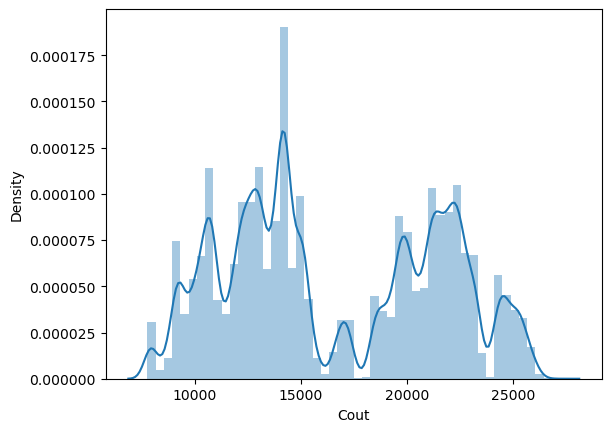

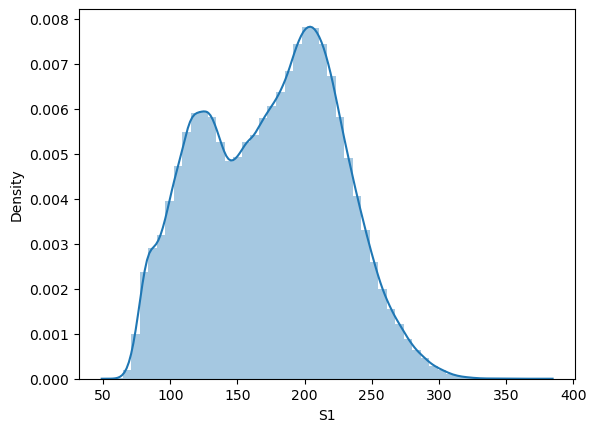

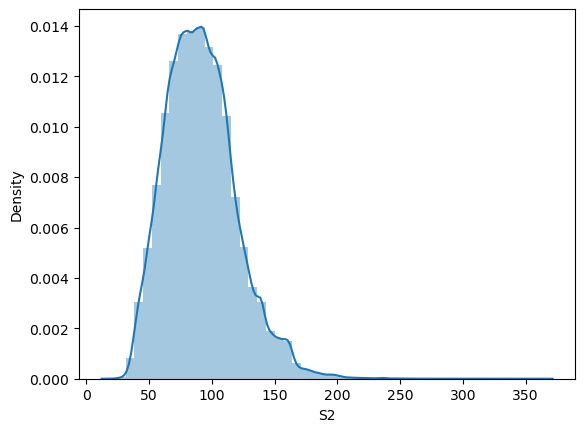

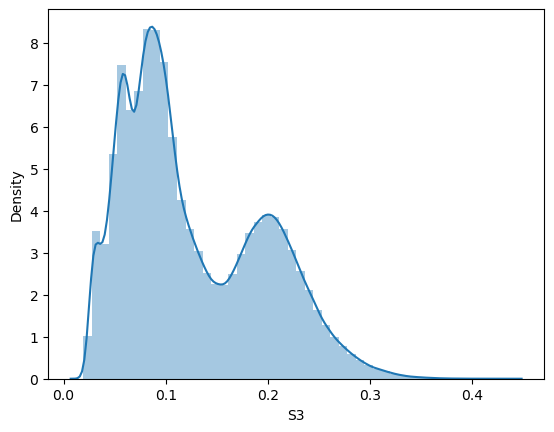

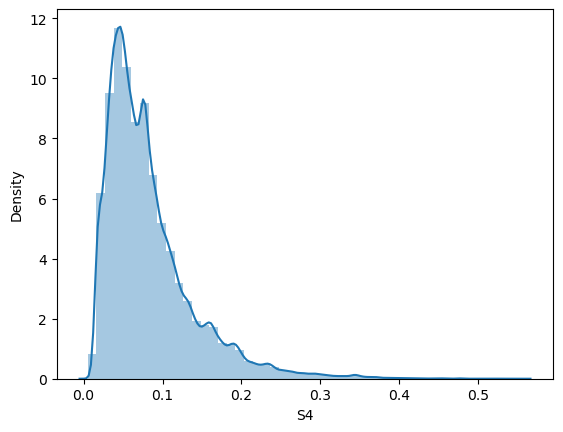

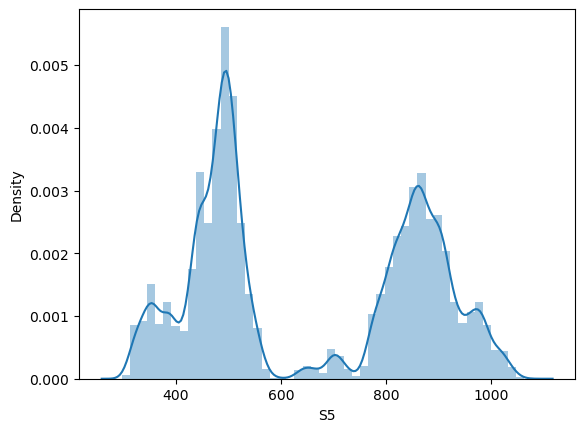

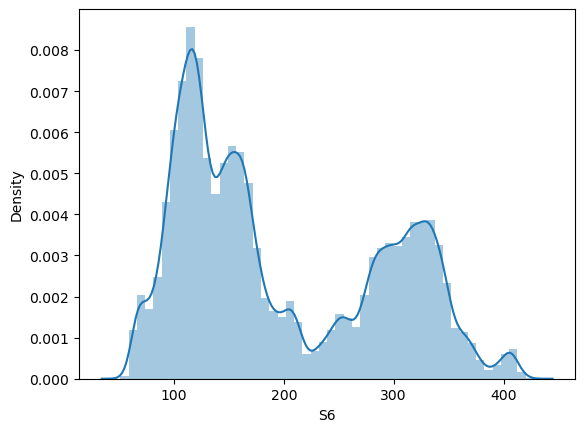

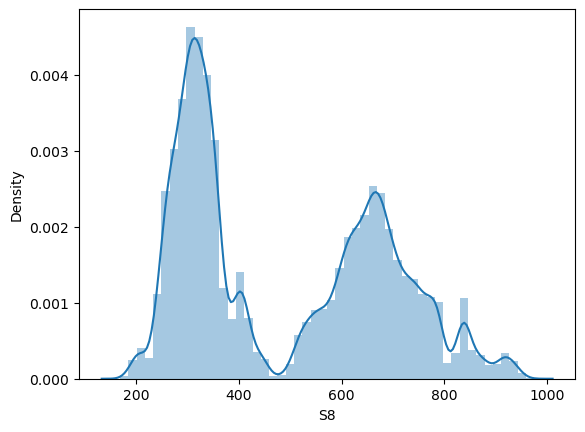

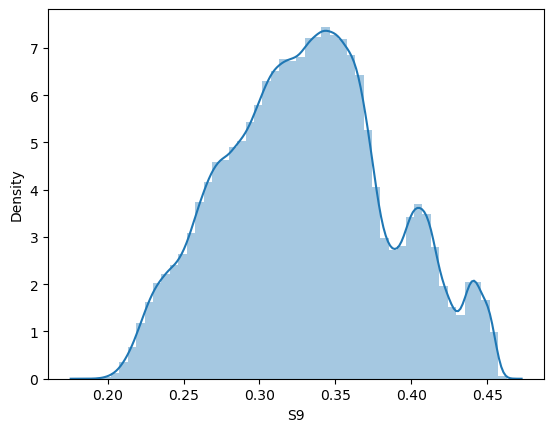

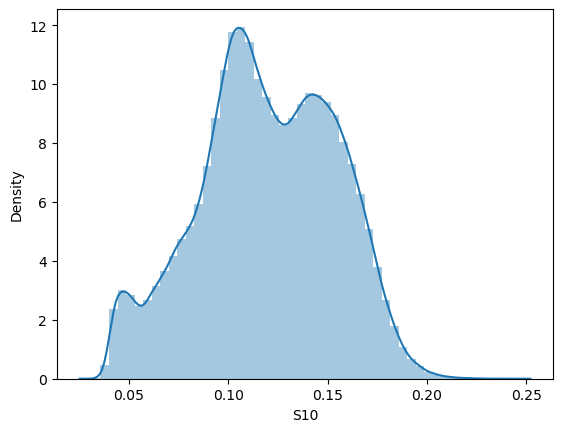

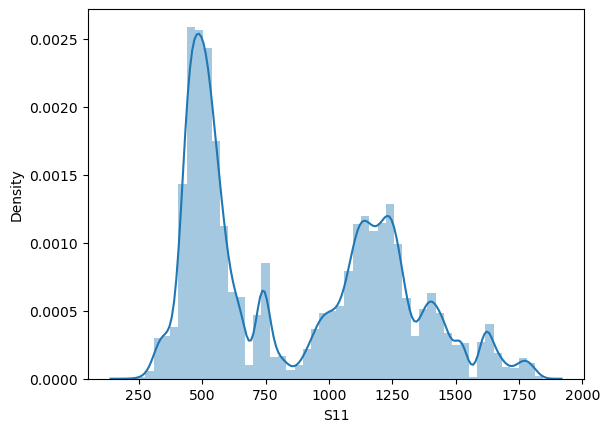

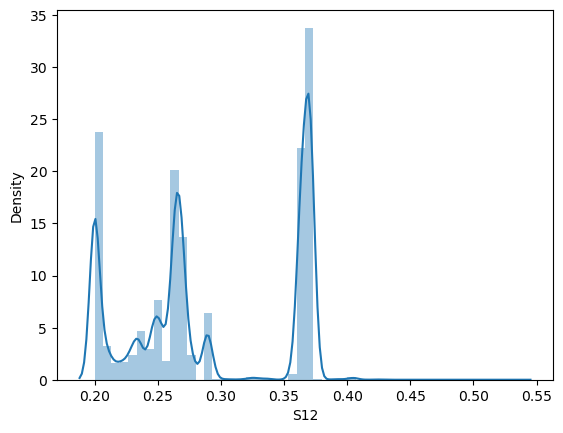

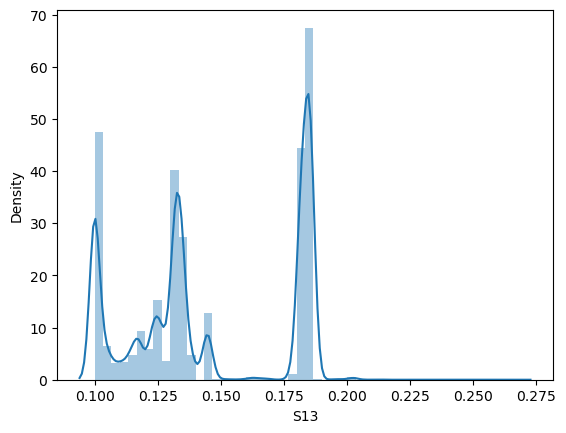

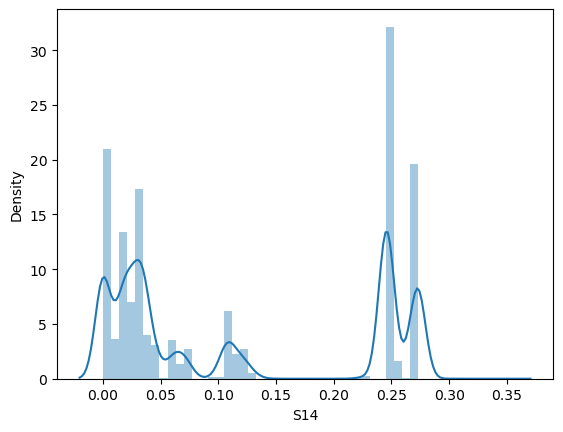

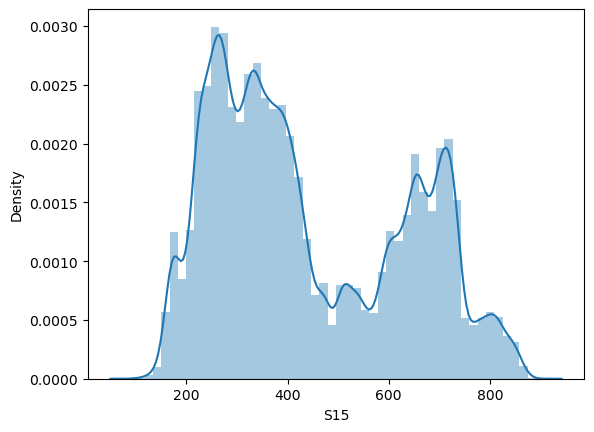

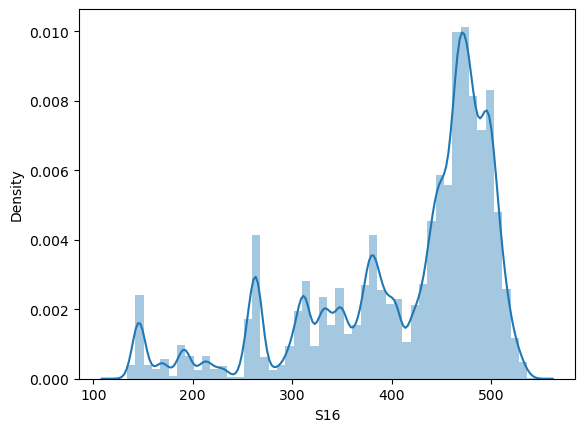

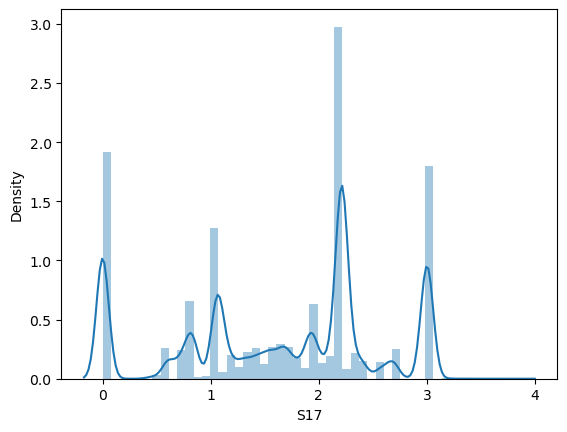

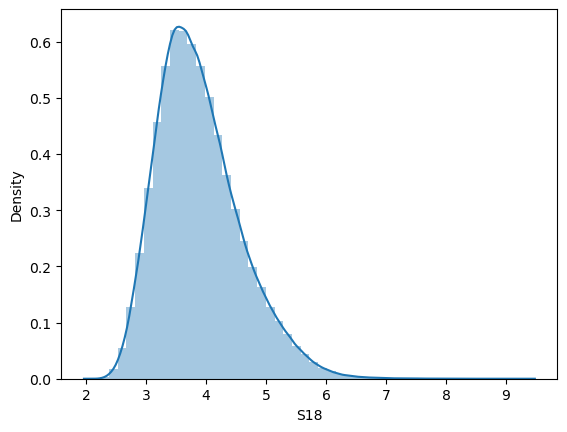

In [12]:
for col in  df.iloc[:, 1:].columns :
    plt.figure()
    sns.distplot(df[col])

C:\Users\Ayman\AppData\Local\Temp\ipykernel_30784\1691140681.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


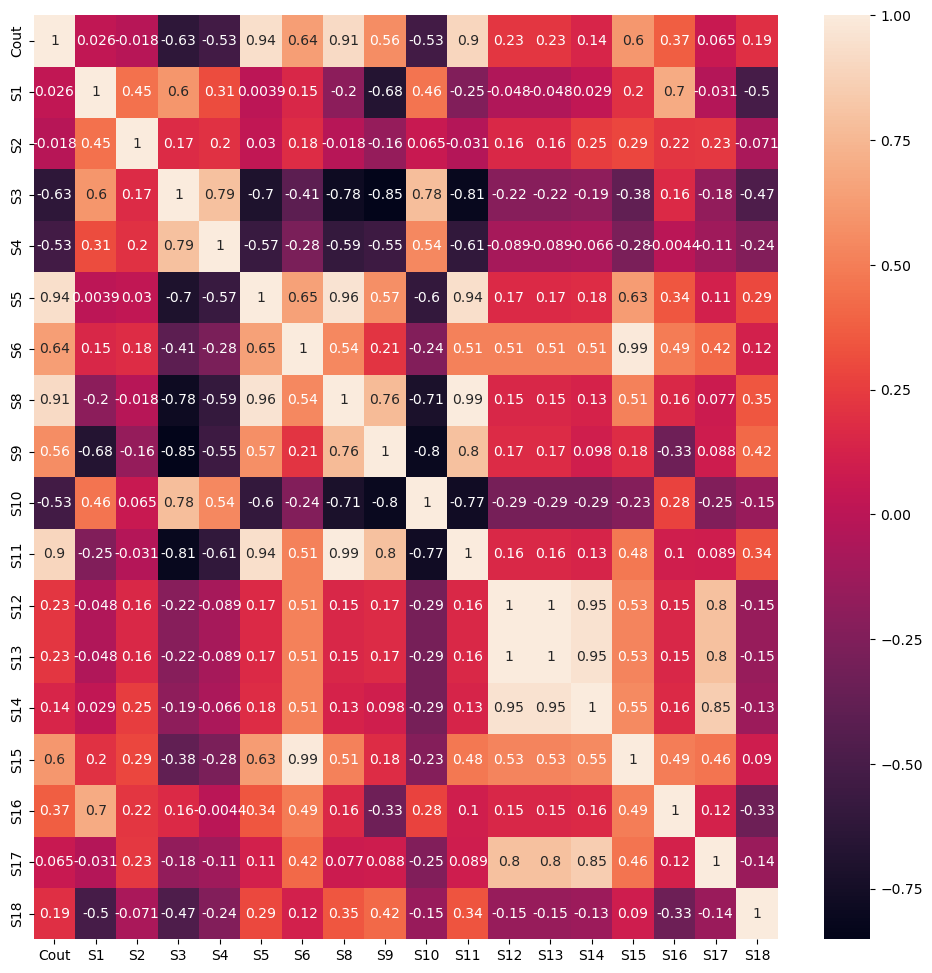

In [9]:
corr = df.corr()

plt.subplots(figsize=(12, 12))
sns.heatmap(corr, annot=True)
plt.show()

### Observations :
- Cout très positivement corrélé à 
    - S5 : Profondeur moyenne des tournées
    - S8 : Longueur moyenne de la plus grande arête de chaque tournée
    - S11 : Longueur moyenne de la première et de la dernière arête de chaque tournée
- Cout très négativement corrélé à 
    - S3 :  Envergure moyenne des tournées
    - S4 : Écart type sur l’envergure des tournées
    - S10 : Longueur de la plus grande arête intérieure de chaque tournée (arête non connectée au dépôt), divisée par la longueur de la tournée
    
- Variables particulièrement corrélées : 
    - Profondeur et longueur (+): évident
    - Envergure et Profondeur (-): Une tournée à petite envergure a tendance à entre 'pointue' et donc profonde : peu de client desservi pour beaucoup de trajet.
    - Envergure et Largeur (+) : évident mais notable.
    
### Conclusions : 
- Des tournées peu profondes mais très larges, quasi circulaires, semblent être celles qui coutent le moins.
- En revanche des tournées profondes, avec de longues arêtes coutent plus.

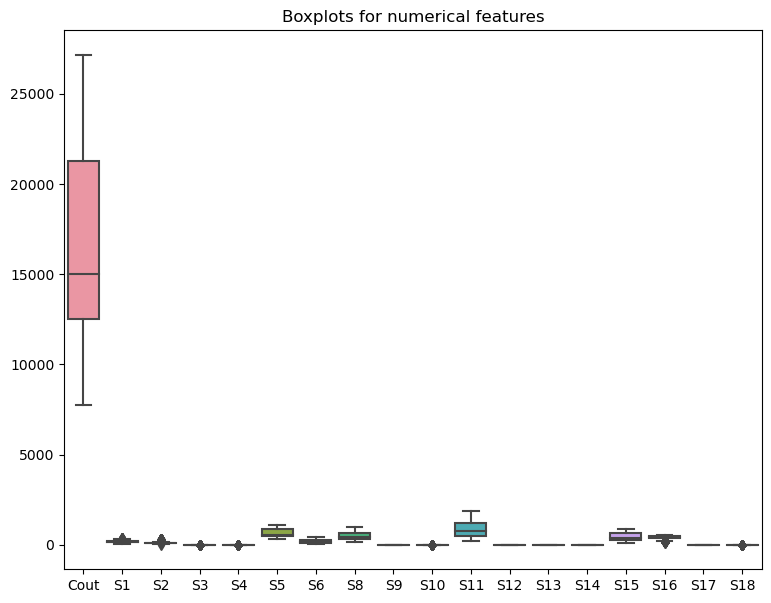

In [10]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df.iloc[:, 1:])
plt.title('Boxplots for numerical features')
plt.show()

#### On normalise nos donées pour une bonne visualisation

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.iloc[:, 1:]) 
df_scaled = pd.DataFrame(df_scaled, index=df.iloc[:, 1:].index, columns=df.iloc[:, 1:].columns) 

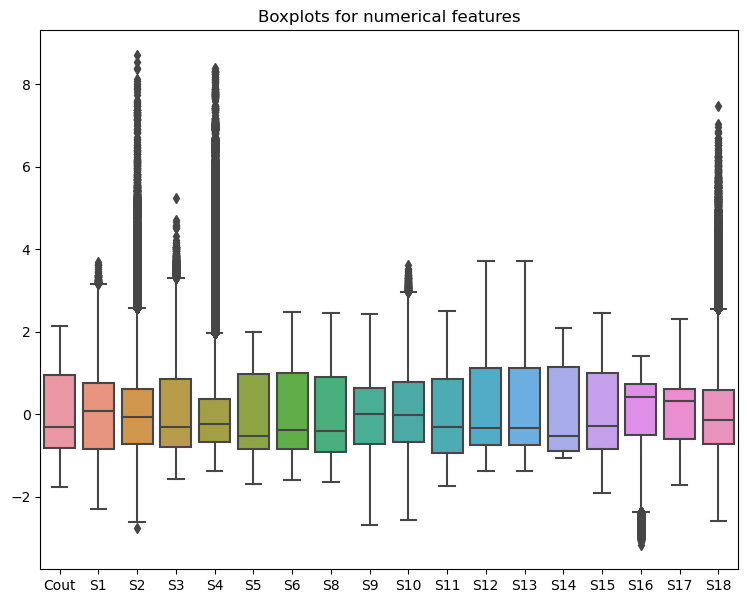

In [12]:
plt.figure(figsize=(9,7))
sns.boxplot(data=df_scaled)
plt.title('Boxplots for numerical features')
plt.show()

### On visualise maintenant notre variable cible "Cout" en fonction de S5 puis S8 (les deux variables ayant la plus forte corrélation avec le coût)

Text(0.5, 1.0, 'Cout en fonction de S5')

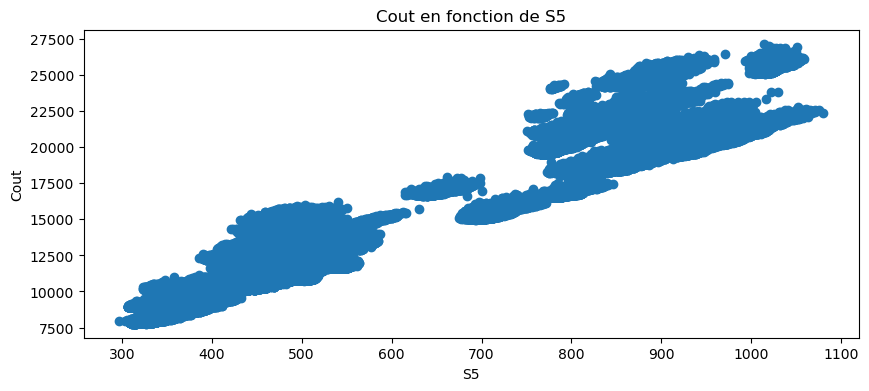

In [13]:
plt.figure(figsize=(10,4))
ax=plt.axes()
x=df['S5']
y=df['Cout']
plt.scatter(x, y)
ax=ax.set(xlabel='S5',ylabel='Cout')
plt.title('Cout en fonction de S5')

Text(0.5, 1.0, 'Cout en fonction de S8')

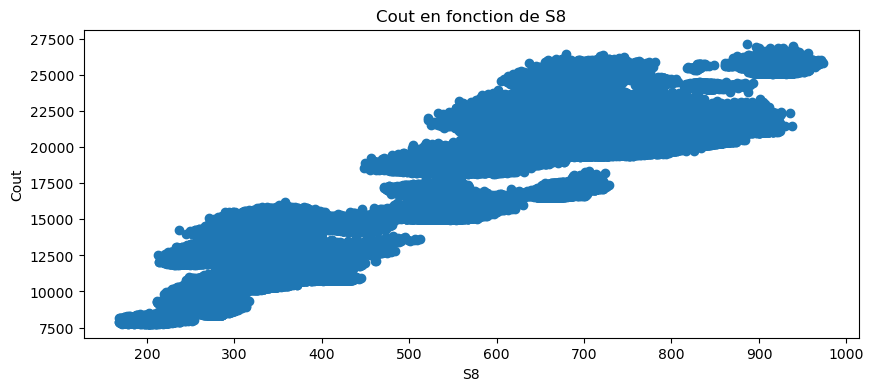

In [14]:
plt.figure(figsize=(10,4))
ax=plt.axes()
x=df['S8']
y=df['Cout']
plt.scatter(x, y)
ax=ax.set(xlabel='S8',ylabel='Cout')
plt.title('Cout en fonction de S8')

### On reproduit les mêmes figures en utilisant les 4 clusters pour la représentation

On commence par ajouter une nouvelle colonne "Cluster" qui prend les valeurs: 2113, 2213, 3113, et 3213

In [16]:
df['Cluster'] =df['Instance'].str.split('_').str.get(1)
df

,Instance,Cout,S1,S2,S3,S4,S5,S6,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,Cluster
652609,XML100_3113_01,24872,211.748,95.1983,0.0923,0.0389,877.077,289.547,722.615,0.3722,0.1358,1281.770,0.2692,0.1346,0.0333,621.114,490.924,1.0659,3.8993,3113
848582,XML100_3113_25,21545,196.132,75.4619,0.0925,0.0381,820.750,317.211,598.083,0.3376,0.1157,1077.170,0.3704,0.1852,0.2457,691.264,491.405,2.2111,3.9219,3113
540579,XML100_2213_17,7840,134.815,74.8228,0.2481,0.2374,326.500,178.434,196.400,0.2610,0.1396,315.100,0.3636,0.1818,0.2727,414.622,261.767,3.0000,4.0100,2213
771406,XML100_3113_14,18906,200.868,97.9977,0.0853,0.0426,865.100,328.539,576.700,0.3100,0.1081,983.600,0.3636,0.1818,0.2727,724.857,493.946,3.0000,3.8100,3113
308744,XML100_2213_25,10593,113.038,54.3342,0.1272,0.0754,393.917,126.543,263.917,0.2964,0.1514,472.500,0.2519,0.1259,0.0331,273.167,377.378,1.4907,4.2344,2213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526072,XML100_2213_07,9969,114.537,90.5912,0.1878,0.2202,366.667,195.336,256.917,0.3116,0.1424,439.417,0.2444,0.1222,0.0178,398.543,270.081,1.0274,4.8556,2213
863779,XML100_3113_18,22524,168.057,64.3732,0.0733,0.0444,886.667,346.844,620.250,0.3332,0.0971,1120.080,0.3704,0.1852,0.2457,711.329,499.716,2.2111,3.6823,3113
30130,XML100_2113_04,14221,222.374,91.8460,0.1862,0.0656,492.250,143.254,280.167,0.2415,0.1681,453.333,0.2444,0.1222,0.0178,344.188,454.366,1.0274,3.7505,2113
826766,XML100_3113_07,18688,192.716,95.4307,0.0987,0.0735,851.600,372.076,518.200,0.2944,0.1116,930.400,0.3636,0.1818,0.2727,792.200,527.176,3.0000,3.9400,3113


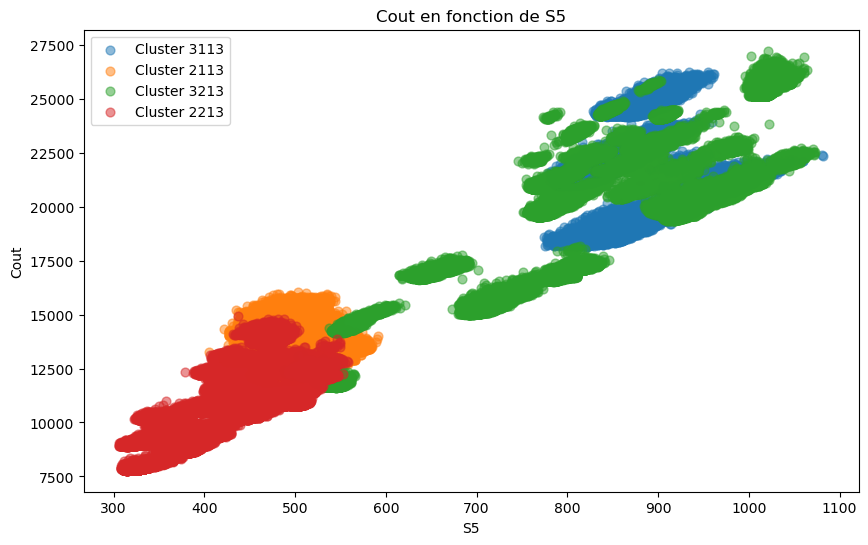

In [45]:
plt.figure(figsize=(10, 6))

for cluster in df["Cluster"].unique() :
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data["S5"], cluster_data["Cout"], label=f'Cluster {cluster}', s=40, alpha=0.5)

plt.xlabel('S5')
plt.ylabel('Cout')
plt.legend()
plt.title('Cout en fonction de S5')
plt.show()

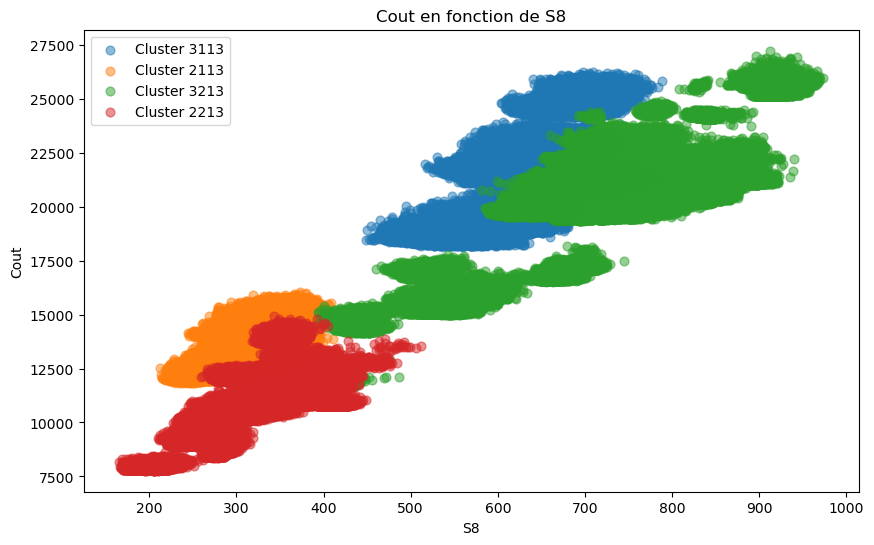

In [46]:
plt.figure(figsize=(10, 6))

for cluster in df["Cluster"].unique() :
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data["S8"], cluster_data["Cout"], label=f'Cluster {cluster}', s=40, alpha=0.5)

plt.xlabel('S8')
plt.ylabel('Cout')
plt.legend()
plt.title('Cout en fonction de S8')
plt.show()

#### On peut remarquer que les distributions de coût sont différentes pour chaque cluster

Text(0, 0.5, 'Cout')

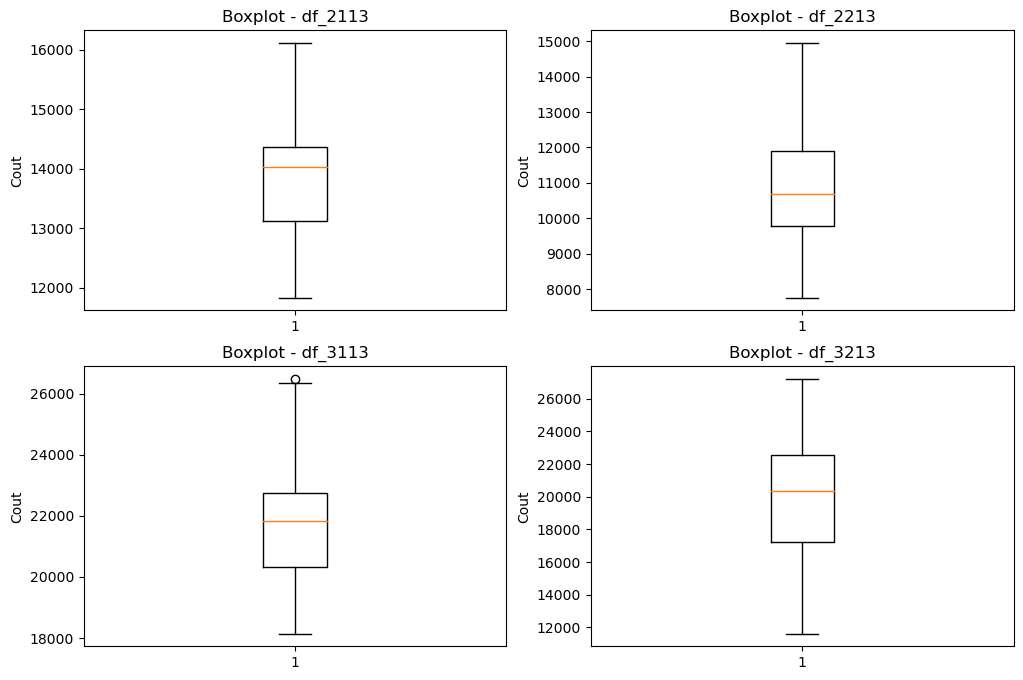

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.boxplot(XML100_2113_df['Cout'])
plt.title("Boxplot - df_2113")
plt.ylabel("Cout")

plt.subplot(2, 2, 2)
plt.boxplot(XML100_2213_df['Cout'])
plt.title("Boxplot - df_2213")
plt.ylabel("Cout")

plt.subplot(2, 2, 3)
plt.boxplot(XML100_3113_df['Cout'])
plt.title("Boxplot - df_3113")
plt.ylabel("Cout")

plt.subplot(2, 2, 4)
plt.boxplot(XML100_3213_df['Cout'])
plt.title("Boxplot - df_3213")
plt.ylabel("Cout")

### Dépot au milieu : Cout ~ [13k, 15k]
### clients dans des grappes géographiques => Cout~[10k,12k] 
### Dépot dans un coin : Cout ~ [20k, 23k]
### clients dans des grappes géographiques => Cout~[18k,22k] 

# Regression Models

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV

On enlève les variables non numériques de nos données

In [20]:
data = df.drop(['Instance','Cluster'], axis =1)
data

,Cout,S1,S2,S3,S4,S5,S6,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18
652609,24872,211.748,95.1983,0.0923,0.0389,877.077,289.547,722.615,0.3722,0.1358,1281.770,0.2692,0.1346,0.0333,621.114,490.924,1.0659,3.8993
848582,21545,196.132,75.4619,0.0925,0.0381,820.750,317.211,598.083,0.3376,0.1157,1077.170,0.3704,0.1852,0.2457,691.264,491.405,2.2111,3.9219
540579,7840,134.815,74.8228,0.2481,0.2374,326.500,178.434,196.400,0.2610,0.1396,315.100,0.3636,0.1818,0.2727,414.622,261.767,3.0000,4.0100
771406,18906,200.868,97.9977,0.0853,0.0426,865.100,328.539,576.700,0.3100,0.1081,983.600,0.3636,0.1818,0.2727,724.857,493.946,3.0000,3.8100
308744,10593,113.038,54.3342,0.1272,0.0754,393.917,126.543,263.917,0.2964,0.1514,472.500,0.2519,0.1259,0.0331,273.167,377.378,1.4907,4.2344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526072,9969,114.537,90.5912,0.1878,0.2202,366.667,195.336,256.917,0.3116,0.1424,439.417,0.2444,0.1222,0.0178,398.543,270.081,1.0274,4.8556
863779,22524,168.057,64.3732,0.0733,0.0444,886.667,346.844,620.250,0.3332,0.0971,1120.080,0.3704,0.1852,0.2457,711.329,499.716,2.2111,3.6823
30130,14221,222.374,91.8460,0.1862,0.0656,492.250,143.254,280.167,0.2415,0.1681,453.333,0.2444,0.1222,0.0178,344.188,454.366,1.0274,3.7505
826766,18688,192.716,95.4307,0.0987,0.0735,851.600,372.076,518.200,0.2944,0.1116,930.400,0.3636,0.1818,0.2727,792.200,527.176,3.0000,3.9400


On divise nos données :  
### On a pris que 50000 lignes compte-tenu du temps d'éxecution et des contraintes liées aux ressources matérielles

In [47]:
X = data.sample(n=50000, random_state=42).drop(['Cout'],axis = 1)
y = data.sample(n=50000, random_state=42).Cout
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### On applique finalement les différents modèles de regression pour la prédiction de notre variable "Cout"
On utilise pour l'évaluation de nos modèles les différentes métriques :
- mean_squared_error 
- r2_score 
- mean_absolute_error 
- mean_absolute_percentage_error

Mean squared error (RMSE) et le score R2 auraient été suffisants pour l'évaluations des modèles mais l'ajout des Mean absolute error (MAE) et Mean absolute error percentage (MAPE) pourra nous donner plus d'informations sur la performance des modèles

In [48]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    
    
    model.fit(X_train, y_train)
    
    
    train_preds = model.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(y_train, train_preds))
    MAE_train = mean_absolute_error(y_train, train_preds)
    MAPE_train = mean_absolute_percentage_error(y_train, train_preds)
    R2_train = r2_score(y_train, train_preds)
    print(name, ' : RMSE on train : ', "%.2f" % RMSE_train, 
          ' MAE on train : ', "%.2f" % MAE_train,
          ' MAPE on train : ', "%.2f" % MAPE_train,
          ' R2 on train : ', "%.2f" % R2_train)
    print('------------')

    
    preds = model.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, preds))
    MAE_test = mean_absolute_error(y_test, preds)
    MAPE_test = mean_absolute_percentage_error(y_test, preds)
    R2_test = r2_score(y_test, preds)
    print(name, ' : RMSE on test : ', "%.2f" % RMSE_test, 
          ' MAE on test : ', "%.2f" % MAE_test,
          ' MAPE on test : ', "%.2f" % MAPE_test,
          ' R2 on test : ', "%.2f" % R2_test)
    print('\n' + '*************************************************' + '\n')


models = [
    ('Linear Regression', LinearRegression()),
    ('SVM Regressor', SVR()),
    ('Decision Tree Regressor', DecisionTreeRegressor()),
    ('Random Forest Regressor', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor()),
    ('Adaboost Regressor', AdaBoostRegressor()),
    ('MLP Regressor', MLPRegressor())
] 

for name, model in models:
    evaluate_model(name, model, X_train, y_train, X_test, y_test)

Linear Regression  : RMSE on train :  619.30  MAE on train :  515.05  MAPE on train :  0.03  R2 on train :  0.98
------------
Linear Regression  : RMSE on test :  615.02  MAE on test :  507.48  MAPE on test :  0.03  R2 on test :  0.98

*************************************************

SVM Regressor  : RMSE on train :  2223.70  MAE on train :  1773.60  MAPE on train :  0.12  R2 on train :  0.80
------------
SVM Regressor  : RMSE on test :  2226.77  MAE on test :  1777.97  MAPE on test :  0.12  R2 on test :  0.80

*************************************************

Decision Tree Regressor  : RMSE on train :  0.00  MAE on train :  0.00  MAPE on train :  0.00  R2 on train :  1.00
------------
Decision Tree Regressor  : RMSE on test :  144.11  MAE on test :  89.97  MAPE on test :  0.01  R2 on test :  1.00

*************************************************

Random Forest Regressor  : RMSE on train :  42.43  MAE on train :  24.14  MAPE on train :  0.00  R2 on train :  1.00
------------
Random

D:\Anaconda\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLP Regressor  : RMSE on train :  926.26  MAE on train :  709.65  MAPE on train :  0.05  R2 on train :  0.97
------------
MLP Regressor  : RMSE on test :  910.82  MAE on test :  699.37  MAPE on test :  0.04  R2 on test :  0.97

*************************************************



#### Linear Regression:

Les scores sur l'ensemble d'entraînement et de test sont assez proches, indiquant une bonne généralisation.
Des scores R2 élevés (0.98) suggèrent que le modèle capture bien la variance des données.

#### SVM Regressor:

Les scores R2 sont plus bas par rapport à la régression linéaire, indiquant que le modèle SVM n'explique pas aussi bien la variance.
Les valeurs élevées de RMSE suggèrent une certaine imprécision dans la prédiction.

#### Decision Tree Regressor:

Les performances exceptionnelles sur l'ensemble d'entraînement (R2 de 1.00) indiquent un surajustement aux données d'entraînement.
Cependant, le modèle a une performance décente sur l'ensemble de test, bien que le RMSE soit un peu élevé.

#### Random Forest Regressor:

Le modèle semble bien généraliser avec des scores élevés sur l'ensemble de test et d'entraînement.
La différence entre les scores sur les ensembles d'entraînement et de test suggère une certaine capacité à éviter l'overfitting.

#### Gradient Boosting Regressor:

Le modèle présente des scores élevés, indiquant une bonne performance à la fois sur l'ensemble d'entraînement et de test.
Il pourrait y avoir une légère indication d'overfitting en raison de la différence entre les scores d'entraînement et de test.

#### Adaboost Regressor:

Les scores sont élevés, mais légèrement inférieurs à ceux de Random Forest et Gradient Boosting.
Comme avec Gradient Boosting, il peut y avoir une légère tendance à l'overfitting.

#### MLP Regressor:

Les scores R2 élevés indiquent une bonne performance, bien que le modèle puisse avoir besoin d'un réglage supplémentaire.
La présence d'un avertissement de non-convergence suggère que le modèle pourrait bénéficier d'une augmentation du nombre d'itérations.

#### En résumé, Random Forest et Gradient Boosting semblent être parmi les modèles les plus performants.

On effectuera une recherche d'hyperparamètres pour un modèle de **Random Forest** à l'aide de la cross-validation avec le module **GridSearchCV**.  
Les paramètres sont un **nombre d'estimateurs** qui prend les valeurs 50, 100, 150, ou 200, et un nombre pour **la profondeur maximale** des arbres utilisées qui prend soit une valuer nulle (valeur non spécifiée), soit 10 ou 20.  
**(On pouvait pas augmenter le nombre d'estimateurs parce que le traitement consomme énormément de temps.)**

In [49]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20],
}

rf_model = RandomForestRegressor()

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

test_preds = best_rf_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
test_r2 = r2_score(y_test, test_preds)

print('Best Model:', best_rf_model)
print('Test RMSE:', test_rmse)
print('Test R2 Score:', test_r2)
print('Optimal n_estimators:', best_rf_model.n_estimators)

Best Model: RandomForestRegressor(n_estimators=200)
Test RMSE: 107.43588756386295
Test R2 Score: 0.9995338095482611
Optimal n_estimators: 200


#### Les résultats obtenus après la recherche d'hyperparamètres et l'évaluation du meilleur modèle sont très prometteurs :
Le modèle Random Forest avec 200 estimateurs a été sélectionné comme le meilleur, démontrant une excellente performance avec un RMSE de 107.44 et un R2 de 0.9995 sur l'ensemble de test. 

# Transformation into a classification problem

On remarque d'après les figures précédentes du coût en fonction de S5 et S8 que la distribution de la variable "Cout" est propre à chaque cluster.
Pour vérifier cela, on redivise notre dataset selon l'appartenance aux clusters.

In [58]:
clusters_dict = {str(cluster): group for cluster, group in df.groupby("Cluster")}

df_2113 = clusters_dict.get("2113", pd.DataFrame())
df_2213 = clusters_dict.get("2213", pd.DataFrame())
df_3113 = clusters_dict.get("3113", pd.DataFrame())
df_3213 = clusters_dict.get("3213", pd.DataFrame())

C:\Users\Ayman\AppData\Local\Temp\ipykernel_30784\418619568.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cluster["Cout"], label=f"Cluster {df_cluster['Cluster'].iloc[0]}", color=colors[i])
C:\Users\Ayman\AppData\Local\Temp\ipykernel_30784\418619568.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



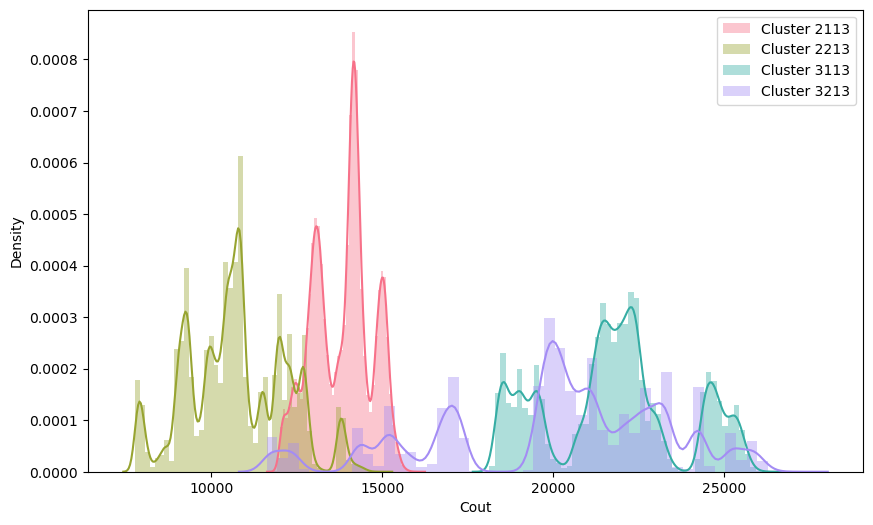

In [62]:
dfs = [df_2113, df_2213, df_3113, df_3213]

plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(dfs))

for i, df_cluster in enumerate(dfs):
    if not df_cluster.empty:
        sns.distplot(df_cluster["Cout"], label=f"Cluster {df_cluster['Cluster'].iloc[0]}", color=colors[i])

plt.legend()

plt.show()

#### Nous allons donc établir un seuil pour nos données selon leur appartenance à son cluster :

On définit des seuils basés sur des quantiles (les 10% des solutions avec le coût le plus bas sont classées comme "excellentes", les solutions entre les 10% et %30 sont classées comme "bonnes", etc.). 
On utilise la fonction 'cut' de pandas pour créer notre colonne "Qualité de la solution".

In [111]:
labels = ['excellente', 'bonne', 'moyenne', 'mauvaise']

for df_cluster in dfs:
    
    q10 = df_cluster['Cout'].quantile(0.10)
    q30 = df_cluster['Cout'].quantile(0.30)
    q70 = df_cluster['Cout'].quantile(0.70)
    seuils = [q10, q30, q70]
    
    df_cluster['Qualité de la solution'] = pd.cut(df_cluster['Cout'], bins=[-float('inf')] + seuils + [float('inf')], labels=labels)
    print(f"Répartition dans le Cluster {df_cluster['Cluster'].iloc[0]} :\n")
    print(df_cluster['Qualité de la solution'].value_counts())
    print("\n")

Répartition dans le Cluster 2113 :

moyenne       121917
mauvaise       91139
bonne          60867
excellente     30483
Name: Qualité de la solution, dtype: int64


Répartition dans le Cluster 2213 :

moyenne       121769
mauvaise       91248
bonne          60940
excellente     30449
Name: Qualité de la solution, dtype: int64


Répartition dans le Cluster 3113 :

moyenne       121782
mauvaise       91254
bonne          60896
excellente     30474
Name: Qualité de la solution, dtype: int64


Répartition dans le Cluster 3213 :

moyenne       121714
mauvaise       91316
bonne          60897
excellente     30479
Name: Qualité de la solution, dtype: int64




On reforme notre dataset final :

In [116]:
df = pd.concat(dfs).sample(frac=1)
df

,Instance,Cout,S1,S2,S3,S4,S5,S6,S8,S9,...,S11,S12,S13,S14,S15,S16,S17,S18,Cluster,Qualité de la solution
622125,XML100_3113_23,18962,198.006,76.1582,0.0873,0.0630,860.300,331.221,610.300,0.3245,...,1049.100,0.3636,0.1818,0.2727,713.477,498.620,3.0000,3.7550,3113,bonne
653611,XML100_3113_25,21742,193.654,81.9050,0.0843,0.0425,825.083,315.759,607.667,0.3363,...,1124.830,0.3704,0.1852,0.2457,699.588,497.019,2.2111,3.4010,3113,moyenne
1170092,XML100_3213_19,19933,141.673,87.1482,0.0634,0.0404,776.417,315.345,657.083,0.4007,...,1233.500,0.3704,0.1852,0.2457,653.851,395.365,2.2111,3.3958,3213,moyenne
66843,XML100_2113_10,13071,284.028,124.5000,0.3078,0.2891,507.100,103.088,281.100,0.2207,...,460.500,0.2000,0.1000,0.0000,189.102,449.106,0.0000,3.8167,2113,bonne
8183,XML100_2113_02,14130,235.248,99.0645,0.2283,0.1584,486.917,165.184,336.000,0.3024,...,514.833,0.3704,0.1852,0.2457,384.896,471.135,2.2111,3.5990,2113,moyenne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766222,XML100_3113_07,18579,229.417,103.6740,0.1092,0.0436,841.500,357.272,532.200,0.3000,...,944.100,0.3636,0.1818,0.2727,798.367,521.622,3.0000,3.7150,3113,excellente
285761,XML100_2113_14,14853,216.545,74.5637,0.2241,0.1022,482.231,152.079,328.769,0.2815,...,540.154,0.2643,0.1321,0.0202,351.021,452.237,0.8213,3.1630,2113,mauvaise
281949,XML100_2113_22,14701,204.737,90.6667,0.1828,0.0960,486.385,119.472,335.154,0.3023,...,550.308,0.2619,0.1310,0.0121,285.002,467.853,0.6057,3.2886,2113,mauvaise
828637,XML100_3113_01,24299,203.275,90.9357,0.1167,0.0780,863.538,327.255,683.385,0.3629,...,1243.080,0.2692,0.1346,0.0333,675.607,496.187,1.0659,3.4139,3113,mauvaise


In [117]:
df['Qualité de la solution'].value_counts()

moyenne       487182
mauvaise      364957
bonne         243600
excellente    121885
Name: Qualité de la solution, dtype: int64

#### Nous allons maintenant choisir un modèle pour cette classification

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [128]:
X = df.sample(n=50000, random_state=42).drop(['Instance', 'Qualité de la solution'],axis = 1)
y = df.sample(n=50000, random_state=42)["Qualité de la solution"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

On utilise **l'accuracy**, **la précison**, **le recall**, et **le F1 score** pour l'évaluattion des modèles.  
On affiche également **la matrice de confusion**.

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  : Accuracy on train :  61.98 % Precision on train :  61.87 % Recall on train :  61.98 % F1 Score on train :  61.46
------------
Logistic Regression  : Accuracy on test :  61.53 % Precision on test :  61.49 % Recall on test :  61.53 % F1 Score on test :  61.00

***********************************************



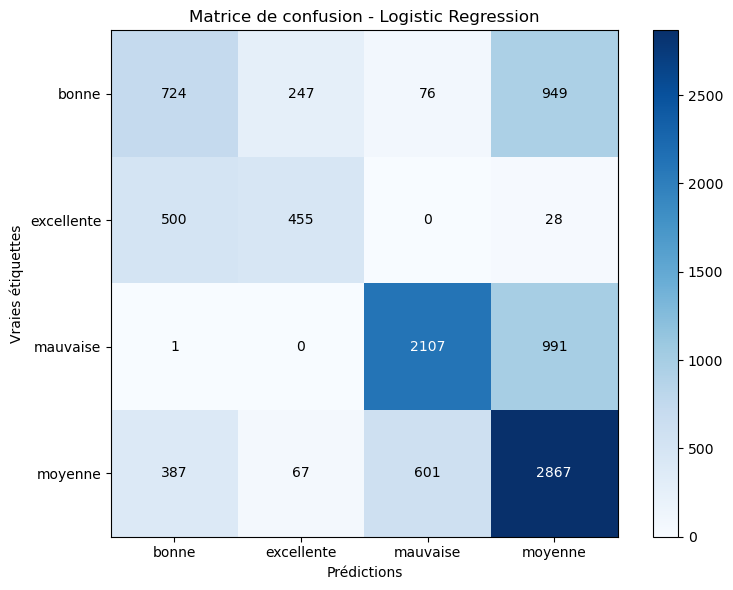

Decision Tree Classifier  : Accuracy on train :  100.00 % Precision on train :  100.00 % Recall on train :  100.00 % F1 Score on train :  100.00
------------
Decision Tree Classifier  : Accuracy on test :  99.87 % Precision on test :  99.87 % Recall on test :  99.87 % F1 Score on test :  99.87

***********************************************



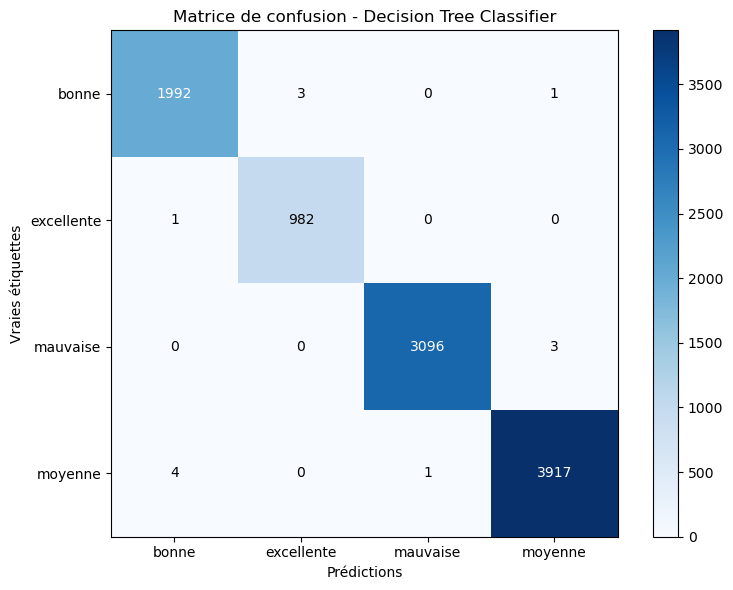

Random Forest Classifier  : Accuracy on train :  100.00 % Precision on train :  100.00 % Recall on train :  100.00 % F1 Score on train :  100.00
------------
Random Forest Classifier  : Accuracy on test :  99.88 % Precision on test :  99.88 % Recall on test :  99.88 % F1 Score on test :  99.88

***********************************************



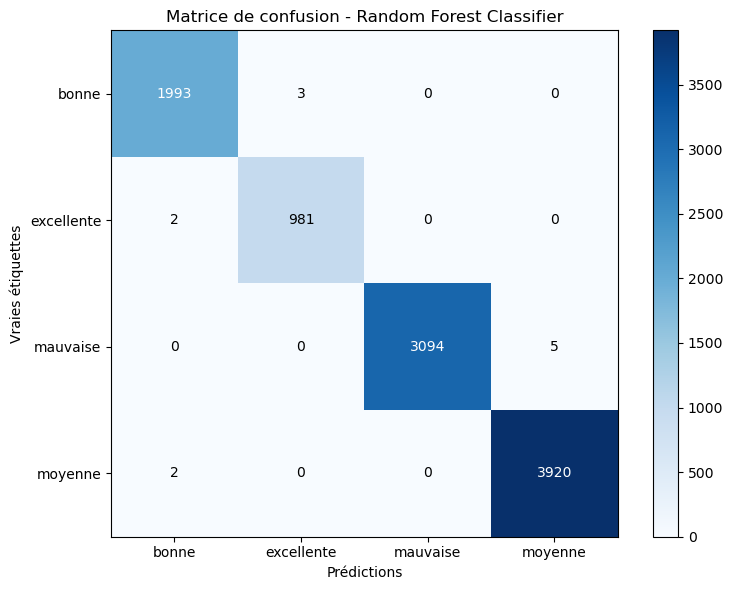

Gradient Boosting Classifier  : Accuracy on train :  100.00 % Precision on train :  100.00 % Recall on train :  100.00 % F1 Score on train :  100.00
------------
Gradient Boosting Classifier  : Accuracy on test :  99.95 % Precision on test :  99.95 % Recall on test :  99.95 % F1 Score on test :  99.95

***********************************************



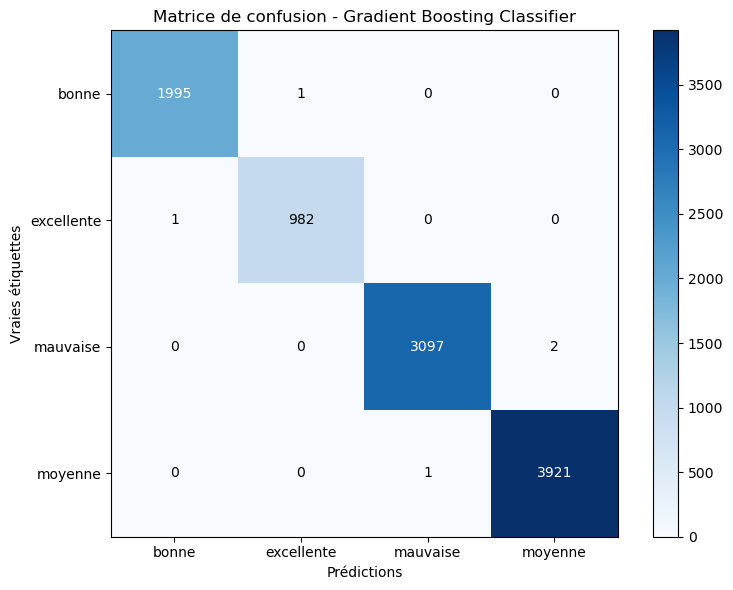

AdaBoost Classifier  : Accuracy on train :  75.47 % Precision on train :  83.76 % Recall on train :  75.47 % F1 Score on train :  76.00
------------
AdaBoost Classifier  : Accuracy on test :  75.64 % Precision on test :  83.48 % Recall on test :  75.64 % F1 Score on test :  76.08

***********************************************



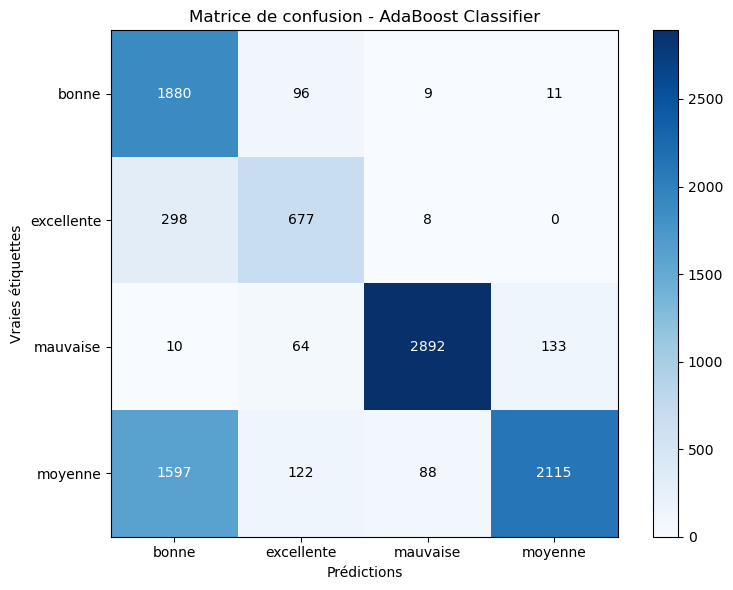

Support Vector Classifier  : Accuracy on train :  62.73 % Precision on train :  62.87 % Recall on train :  62.73 % F1 Score on train :  60.85
------------
Support Vector Classifier  : Accuracy on test :  61.49 % Precision on test :  61.37 % Recall on test :  61.49 % F1 Score on test :  59.45

***********************************************



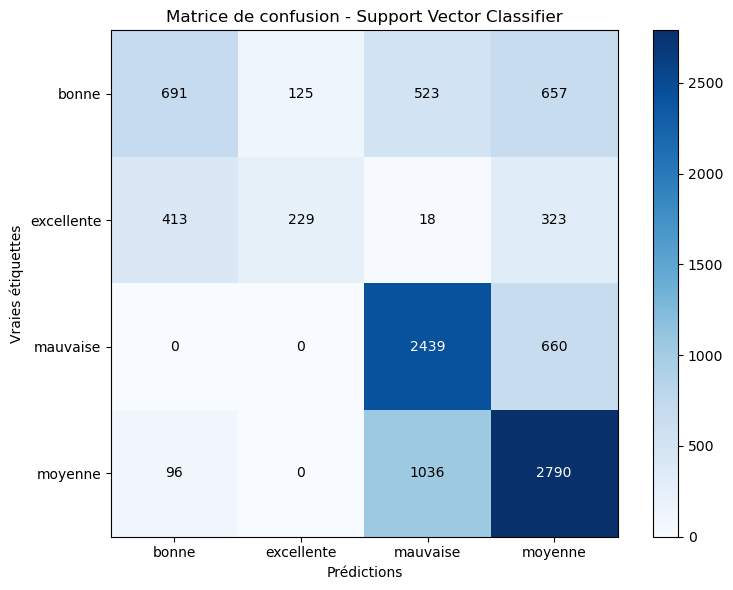

In [132]:
def evaluate_classification_model(name, model, X_train, y_train, X_test, y_test):
    # Entraîner le modèle
    model.fit(X_train, y_train)

    # Prédire sur l'ensemble d'entraînement
    train_preds = model.predict(X_train)

    # Mesures de performance sur l'ensemble d'entraînement
    accuracy_train = accuracy_score(y_train, train_preds)
    precision_train = precision_score(y_train, train_preds, average='weighted')
    recall_train = recall_score(y_train, train_preds, average='weighted')
    f1_train = f1_score(y_train, train_preds, average='weighted')

    print(name, ' : Accuracy on train : ', "%.2f" % (accuracy_train * 100),
          '% Precision on train : ', "%.2f" % (precision_train * 100),
          '% Recall on train : ', "%.2f" % (recall_train * 100),
          '% F1 Score on train : ', "%.2f" % (f1_train * 100))
    print('------------')

    # Prédire sur l'ensemble de test
    preds = model.predict(X_test)

    # Mesures de performance sur l'ensemble de test
    accuracy_test = accuracy_score(y_test, preds)
    precision_test = precision_score(y_test, preds, average='weighted')
    recall_test = recall_score(y_test, preds, average='weighted')
    f1_test = f1_score(y_test, preds, average='weighted')

    print(name, ' : Accuracy on test : ', "%.2f" % (accuracy_test * 100),
          '% Precision on test : ', "%.2f" % (precision_test * 100),
          '% Recall on test : ', "%.2f" % (recall_test * 100),
          '% F1 Score on test : ', "%.2f" % (f1_test * 100))
    print('\n' + '***********************************************' + '\n')

    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test, preds)

    # Afficher la matrice de confusion
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Matrice de confusion - {name}')
    plt.colorbar()

    classes = np.unique(y_test)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    plt.ylabel('Vraies étiquettes')
    plt.xlabel('Prédictions')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

# Liste des modèles de classification
classification_models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('Support Vector Classifier', SVC())
]

# Appliquer la fonction à chaque modèle de classification
for name, model in classification_models:
    evaluate_classification_model(name, model, X_train, y_train, X_test, y_test)

#### Logistic Regression :

L'accuracy est d'environ 61.98% sur l'ensemble d'entraînement et 61.53% sur l'ensemble de test.
La précision, le recall et le F1 Score sont également autour de ces valeurs.
Ces résultats suggèrent une performance modérée du modèle Logistic Regression sur ces données.

#### Decision Tree Classifier :

Un accuracy de 100% sur l'ensemble d'entraînement indique que le modèle a parfaitement appris les données d'entraînement.
Des performances très élevées sont également observées sur l'ensemble de test, ce qui pourrait indiquer un overfitting

#### Random Forest Classifier :

De manière similaire au Decision Tree Classifier, des performances parfaites sur l'ensemble d'entraînement et très élevées sur l'ensemble de test sont observées.

#### Gradient Boosting Classifier :

Encore une fois, des performances parfaites sur l'ensemble d'entraînement et très élevées sur l'ensemble de test.
Les modèles de boosting comme Gradient Boosting peuvent avoir une forte capacité d'ajustement.

#### AdaBoost Classifier :

Des performances plus modérées par rapport aux modèles précédents, avec un F1 Score de 76.08% sur l'ensemble de test.
AdaBoost peut être plus robuste face à l'overfitting par rapport à certains autres algorithmes de boosting.

#### Support Vector Classifier (SVC) :

Des performances similaires à la Logistic Regression, avec un F1 Score de 59.45% sur l'ensemble de test.
La précision, le recall et le F1 Score sont relativement similaires à ceux de la Logistic Regression.

#### En général, les résultats suggèrent que les modèles de Random Forest et Gradient Boosting ont appris à partir des données d'entraînement de manière très détaillée, mais il est possible qu'ils soient surajustés aux données d'entraînement. Le modèle AdaBoost montre des performances un peu plus modérées, et la Logistic Regression ainsi que le Support Vector Classifier ont des performances comparables mais un peu plus basses.